In [ ]:
#1er paso: LIMPIEZA DEL DATASET

import pandas as pd
import numpy as np


def diagnostico_rapido(archivo):
    """
    Diagnóstico rápido para entender por qué el dataset se vacía
    """
    print("🔍 DIAGNÓSTICO RÁPIDO - Investigando el problema")
    print("="*60)

    # Cargar dataset
    try:
        df = pd.read_csv(archivo, encoding='utf-8')
        print(f"✅ Dataset cargado: {len(df):,} filas")
    except:
        df = pd.read_csv(archivo, encoding='latin1')
        print(f"✅ Dataset cargado (latin1): {len(df):,} filas")

    # 1. VERIFICAR COLUMNA ESTADO
    print(f"\n1️⃣ ANÁLISIS DE LA COLUMNA 'ESTADO':")
    if 'ESTADO' in df.columns:
        estados = df['ESTADO'].value_counts()
        print(f"   Total de estados únicos: {len(estados)}")
        print(f"   Estados encontrados:")
        for i, (estado, count) in enumerate(estados.items()):
            if i < 15:  # Mostrar solo los primeros 15
                percentage = (count / len(df)) * 100
                print(f"     '{estado}': {count:,} proyectos ({percentage:.1f}%)")
            elif i == 15:
                print(f"     ... y {len(estados) - 15} estados más")
                break

        # Verificar si hay estados que podrían ser viables
        estados_posibles_viables = []
        for estado in estados.index:
            estado_upper = str(estado).upper()
            if any(palabra in estado_upper for palabra in ['VIABLE', 'EJECUCION', 'EJECUT', 'CERRADO', 'CONCLUIDO', 'OPERATIVO']):
                estados_posibles_viables.append(estado)

        print(f"\n   🎯 Estados que podrían ser VIABLES ({len(estados_posibles_viables)}):")
        for estado in estados_posibles_viables[:10]:
            count = estados[estado]
            print(f"     '{estado}': {count:,} proyectos")

    # 2. VERIFICAR COLUMNA MONTO_VIABLE
    print(f"\n2️⃣ ANÁLISIS DE LA COLUMNA 'MONTO_VIABLE':")
    if 'MONTO_VIABLE' in df.columns:
        monto_stats = df['MONTO_VIABLE'].describe()
        print(f"   Valores nulos: {df['MONTO_VIABLE'].isnull().sum():,}")
        print(f"   Valores = 0: {(df['MONTO_VIABLE'] == 0).sum():,}")
        print(f"   Valores > 0: {(df['MONTO_VIABLE'] > 0).sum():,}")
        print(f"   Mínimo: ${monto_stats['min']:,.2f}")
        print(f"   Máximo: ${monto_stats['max']:,.2f}")
        print(f"   Promedio: ${monto_stats['mean']:,.2f}")
        print(f"   Mediana: ${monto_stats['50%']:,.2f}")

    # 3. VERIFICAR COLUMNA AVANCE_FISICO
    print(f"\n3️⃣ ANÁLISIS DE LA COLUMNA 'AVANCE_FISICO':")
    if 'AVANCE_FISICO' in df.columns:
        avance_stats = df['AVANCE_FISICO'].describe()
        print(f"   Valores nulos: {df['AVANCE_FISICO'].isnull().sum():,}")
        print(f"   Valores = 0: {(df['AVANCE_FISICO'] == 0).sum():,}")
        print(f"   Valores > 0 y < 100: {((df['AVANCE_FISICO'] > 0) & (df['AVANCE_FISICO'] < 100)).sum():,}")
        print(f"   Valores = 100: {(df['AVANCE_FISICO'] == 100).sum():,}")
        print(f"   Mínimo: {avance_stats['min']:.1f}%")
        print(f"   Máximo: {avance_stats['max']:.1f}%")
        print(f"   Promedio: {avance_stats['mean']:.1f}%")

    # 4. SIMULACIÓN DE FILTROS
    print(f"\n4️⃣ SIMULACIÓN DE FILTROS:")
    df_test = df.copy()

    print(f"   Proyectos iniciales: {len(df_test):,}")

    # Filtro por monto > 0
    if 'MONTO_VIABLE' in df_test.columns:
        df_test = df_test[df_test['MONTO_VIABLE'] > 0]
        print(f"   Después de MONTO_VIABLE > 0: {len(df_test):,}")

    # Probar diferentes filtros de estado
    if 'ESTADO' in df.columns and len(df_test) > 0:
        # Filtro original (muy restrictivo)
        estados_restrictivos = ['VIABLE', 'EN EJECUCION', 'EJECUTADO', 'CERRADO']
        df_restrictivo = df_test[df_test['ESTADO'].isin(estados_restrictivos)]
        print(f"   Con filtro RESTRICTIVO: {len(df_restrictivo):,}")

        # Filtro más permisivo
        estados_permisivos = []
        for estado in df['ESTADO'].unique():
            estado_str = str(estado).upper()
            if any(palabra in estado_str for palabra in ['VIABLE', 'EJECUCION', 'EJECUT', 'OPERATIVO', 'CONCLUIDO']):
                estados_permisivos.append(estado)

        df_permisivo = df_test[df_test['ESTADO'].isin(estados_permisivos)]
        print(f"   Con filtro PERMISIVO: {len(df_permisivo):,}")

        # Sin filtro de estado
        print(f"   SIN filtro de estado: {len(df_test):,}")

    # 5. RECOMENDACIONES
    print(f"\n5️⃣ RECOMENDACIONES:")

    proyectos_con_monto = (df['MONTO_VIABLE'] > 0).sum() if 'MONTO_VIABLE' in df.columns else 0

    if proyectos_con_monto == 0:
        print("   ❌ PROBLEMA CRÍTICO: No hay proyectos con MONTO_VIABLE > 0")
        print("   ✅ SOLUCIÓN: Revisar si la columna MONTO_VIABLE tiene datos válidos")
    elif proyectos_con_monto < 1000:
        print(f"   ⚠️ ADVERTENCIA: Solo {proyectos_con_monto:,} proyectos con monto > 0")
        print("   ✅ RECOMENDACIÓN: Revisar calidad de datos en MONTO_VIABLE")
    else:
        print(f"   ✅ BUENO: {proyectos_con_monto:,} proyectos tienen MONTO_VIABLE > 0")

    if 'ESTADO' in df.columns:
        if len(estados_permisivos) > 0:
            print(f"   ✅ RECOMENDACIÓN: Usar filtro permisivo de estados ({len(estados_permisivos)} estados)")
            print(f"   📋 Estados recomendados: {estados_permisivos[:5]}")
        else:
            print("   ⚠️ RECOMENDACIÓN: NO filtrar por estado, mantener todos los proyectos")

    print(f"\n6️⃣ ESTRATEGIA RECOMENDADA:")
    print("   1. Mantener todos los proyectos con MONTO_VIABLE > 0")
    print("   2. NO filtrar por ESTADO (o usar filtro muy permisivo)")
    print("   3. Dejar que el Genetic Algorithm maneje la selección")
    print("   4. Usar restricciones en el GA en lugar de filtros previos")

# Función para crear dataset limpio SIN filtros agresivos
def limpieza_suave(archivo_entrada, archivo_salida='dataset_suave.csv'):
    """
    Limpieza MUY suave que mantiene la mayoría de datos
    """
    print("🧹 LIMPIEZA SUAVE - Manteniendo máximo de datos")

    # Cargar
    try:
        df = pd.read_csv(archivo_entrada, encoding='utf-8')
    except:
        df = pd.read_csv(archivo_entrada, encoding='latin1')

    print(f"📊 Dataset original: {len(df):,} proyectos")

    # Columnas esenciales
    columnas = [
        'CODIGO_UNICO', 'NOMBRE_INVERSION', 'AVANCE_FISICO', 'MONTO_VIABLE',
        'DEPARTAMENTO', 'PROVINCIA', 'BENEFICIARIO', 'ESTADO', 'SECTOR',
        'COSTO_ACTUALIZADO', 'PIM_ANIO_ACTUAL', 'TIPO_INVERSION'
    ]

    columnas_disponibles = [col for col in columnas if col in df.columns]
    df_limpio = df[columnas_disponibles].copy()

    # Tipos de datos básicos
    if 'CODIGO_UNICO' in df_limpio.columns:
        df_limpio['CODIGO_UNICO'] = pd.to_numeric(df_limpio['CODIGO_UNICO'], errors='coerce').fillna(0).astype(int)

    # Variables numéricas
    for col in ['AVANCE_FISICO', 'MONTO_VIABLE', 'BENEFICIARIO', 'COSTO_ACTUALIZADO', 'PIM_ANIO_ACTUAL']:
        if col in df_limpio.columns:
            df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')

    # Rellenar valores faltantes de forma conservadora
    if 'AVANCE_FISICO' in df_limpio.columns:
        df_limpio['AVANCE_FISICO'] = df_limpio['AVANCE_FISICO'].fillna(0)

    if 'MONTO_VIABLE' in df_limpio.columns:
        mediana_monto = df_limpio['MONTO_VIABLE'].median()
        df_limpio['MONTO_VIABLE'] = df_limpio['MONTO_VIABLE'].fillna(mediana_monto)

    if 'BENEFICIARIO' in df_limpio.columns:
        df_limpio['BENEFICIARIO'] = df_limpio['BENEFICIARIO'].fillna(0).astype(int)

    # Variables categóricas
    for col in ['DEPARTAMENTO', 'PROVINCIA', 'ESTADO', 'SECTOR', 'TIPO_INVERSION', 'NOMBRE_INVERSION']:
        if col in df_limpio.columns:
            df_limpio[col] = df_limpio[col].astype(str).str.strip()
            df_limpio[col] = df_limpio[col].replace(['nan', 'NaN', 'None'], 'NO_ESPECIFICADO')

    # FILTROS MÍNIMOS
    # Solo eliminar proyectos completamente inválidos
    inicial = len(df_limpio)

    # Solo mantener proyectos con monto > 0 (esto es esencial)
    if 'MONTO_VIABLE' in df_limpio.columns:
        df_limpio = df_limpio[df_limpio['MONTO_VIABLE'] > 0].copy()
        print(f"🔍 Filtro monto > 0: {inicial:,} → {len(df_limpio):,}")

    # Eliminar duplicados obvios
    if 'CODIGO_UNICO' in df_limpio.columns:
        antes = len(df_limpio)
        df_limpio = df_limpio.drop_duplicates(subset='CODIGO_UNICO').copy()
        print(f"🔍 Duplicados eliminados: {antes - len(df_limpio):,}")

    # Variables derivadas útiles
    if len(df_limpio) > 0:
        if 'AVANCE_FISICO' in df_limpio.columns and 'MONTO_VIABLE' in df_limpio.columns:
            df_limpio['EFICIENCIA'] = df_limpio['AVANCE_FISICO'] / (df_limpio['MONTO_VIABLE'] / 1000000)

        if 'MONTO_VIABLE' in df_limpio.columns and 'BENEFICIARIO' in df_limpio.columns:
            df_limpio['COSTO_POR_BENEFICIARIO'] = np.where(
                df_limpio['BENEFICIARIO'] > 0,
                df_limpio['MONTO_VIABLE'] / df_limpio['BENEFICIARIO'],
                df_limpio['MONTO_VIABLE']  # Si no hay beneficiarios, usar el monto total
            )

    # Guardar
    df_limpio.to_csv(archivo_salida, index=False, encoding='utf-8')

    print(f"✅ Dataset limpio guardado: {len(df_limpio):,} proyectos")
    print(f"📊 Columnas finales: {len(df_limpio.columns)}")

    if len(df_limpio) > 0:
        print(f"💰 Inversión total: ${df_limpio['MONTO_VIABLE'].sum():,.0f}")
        print(f"📈 Avance promedio: {df_limpio['AVANCE_FISICO'].mean():.1f}%")
        if 'DEPARTAMENTO' in df_limpio.columns:
            print(f"🗺️ Departamentos: {df_limpio['DEPARTAMENTO'].nunique()}")

    return df_limpio

if __name__ == "__main__":
    archivo = "DETALLE_INVERSIONES.csv"  # Cambiar por tu archivo

    # Paso 1: Diagnóstico
    diagnostico_rapido(archivo)

    print("\n" + "="*60)

    # Paso 2: Limpieza suave
    dataset_final = limpieza_suave(archivo, "dataset_final_suave.csv")



🔍 DIAGNÓSTICO RÁPIDO - Investigando el problema
✅ Dataset cargado: 257,591 filas

1️⃣ ANÁLISIS DE LA COLUMNA 'ESTADO':
   Total de estados únicos: 1
   Estados encontrados:
     'ACTIVO': 257,591 proyectos (100.0%)

   🎯 Estados que podrían ser VIABLES (0):

2️⃣ ANÁLISIS DE LA COLUMNA 'MONTO_VIABLE':
   Valores nulos: 239
   Valores = 0: 0
   Valores > 0: 257,352
   Mínimo: $1.00
   Máximo: $30,552,699,580.07
   Promedio: $4,300,857.47
   Mediana: $698,752.09

3️⃣ ANÁLISIS DE LA COLUMNA 'AVANCE_FISICO':
   Valores nulos: 206,204
   Valores = 0: 3,779
   Valores > 0 y < 100: 29,592
   Valores = 100: 17,829
   Mínimo: 0.0%
   Máximo: 4393721.0%
   Promedio: 232.5%

4️⃣ SIMULACIÓN DE FILTROS:
   Proyectos iniciales: 257,591
   Después de MONTO_VIABLE > 0: 257,352
   Con filtro RESTRICTIVO: 0
   Con filtro PERMISIVO: 0
   SIN filtro de estado: 257,352

5️⃣ RECOMENDACIONES:
   ✅ BUENO: 257,352 proyectos tienen MONTO_VIABLE > 0
   ⚠️ RECOMENDACIÓN: NO filtrar por estado, mantener todos los p

🚀 EJECUTANDO REFINAMIENTO FINAL
🎯 REFINAMIENTO FINAL PARA GENETIC ALGORITHMS
📊 Dataset cargado: 257,525 proyectos

1️⃣ LIMPIANDO VARIABLE OBJETIVO (AVANCE_FISICO):
   Antes - Nulos: 0
   Antes - Rango: 0.0% a 4,393,721.0%
   Proyectos con avance > 100%: 187
   Después - Rango: 0.0% a 100.0%
   Después - Promedio: 14.7%
   📊 Distribución del avance físico:
     Sin avance (0%): 209,917 (81.5%)
     En proceso (0-50%): 8,722 (3.4%)
     Avanzado (50-99%): 20,870 (8.1%)
     Completado (100%): 18,016 (7.0%)

2️⃣ VALIDANDO RESTRICCIONES PRESUPUESTALES:
   Inversión total disponible: $1,106,891,827,939
   Proyecto más barato: $1
   Proyecto más caro: $30,552,699,580
   📊 Distribución de costos:
     Q25 (25%): $242,310
     Mediana: $698,752
     Q75 (75%): $2,282,930
     Q90 (90%): $6,012,905
     Q95 (95%): $10,153,123

3️⃣ ANÁLISIS PARA RESTRICCIONES REGIONALES:
   Departamentos únicos: 27
   📊 Top 10 departamentos por número de proyectos:
      1. LIMA: 27,619 proyectos ($180,850,540,3

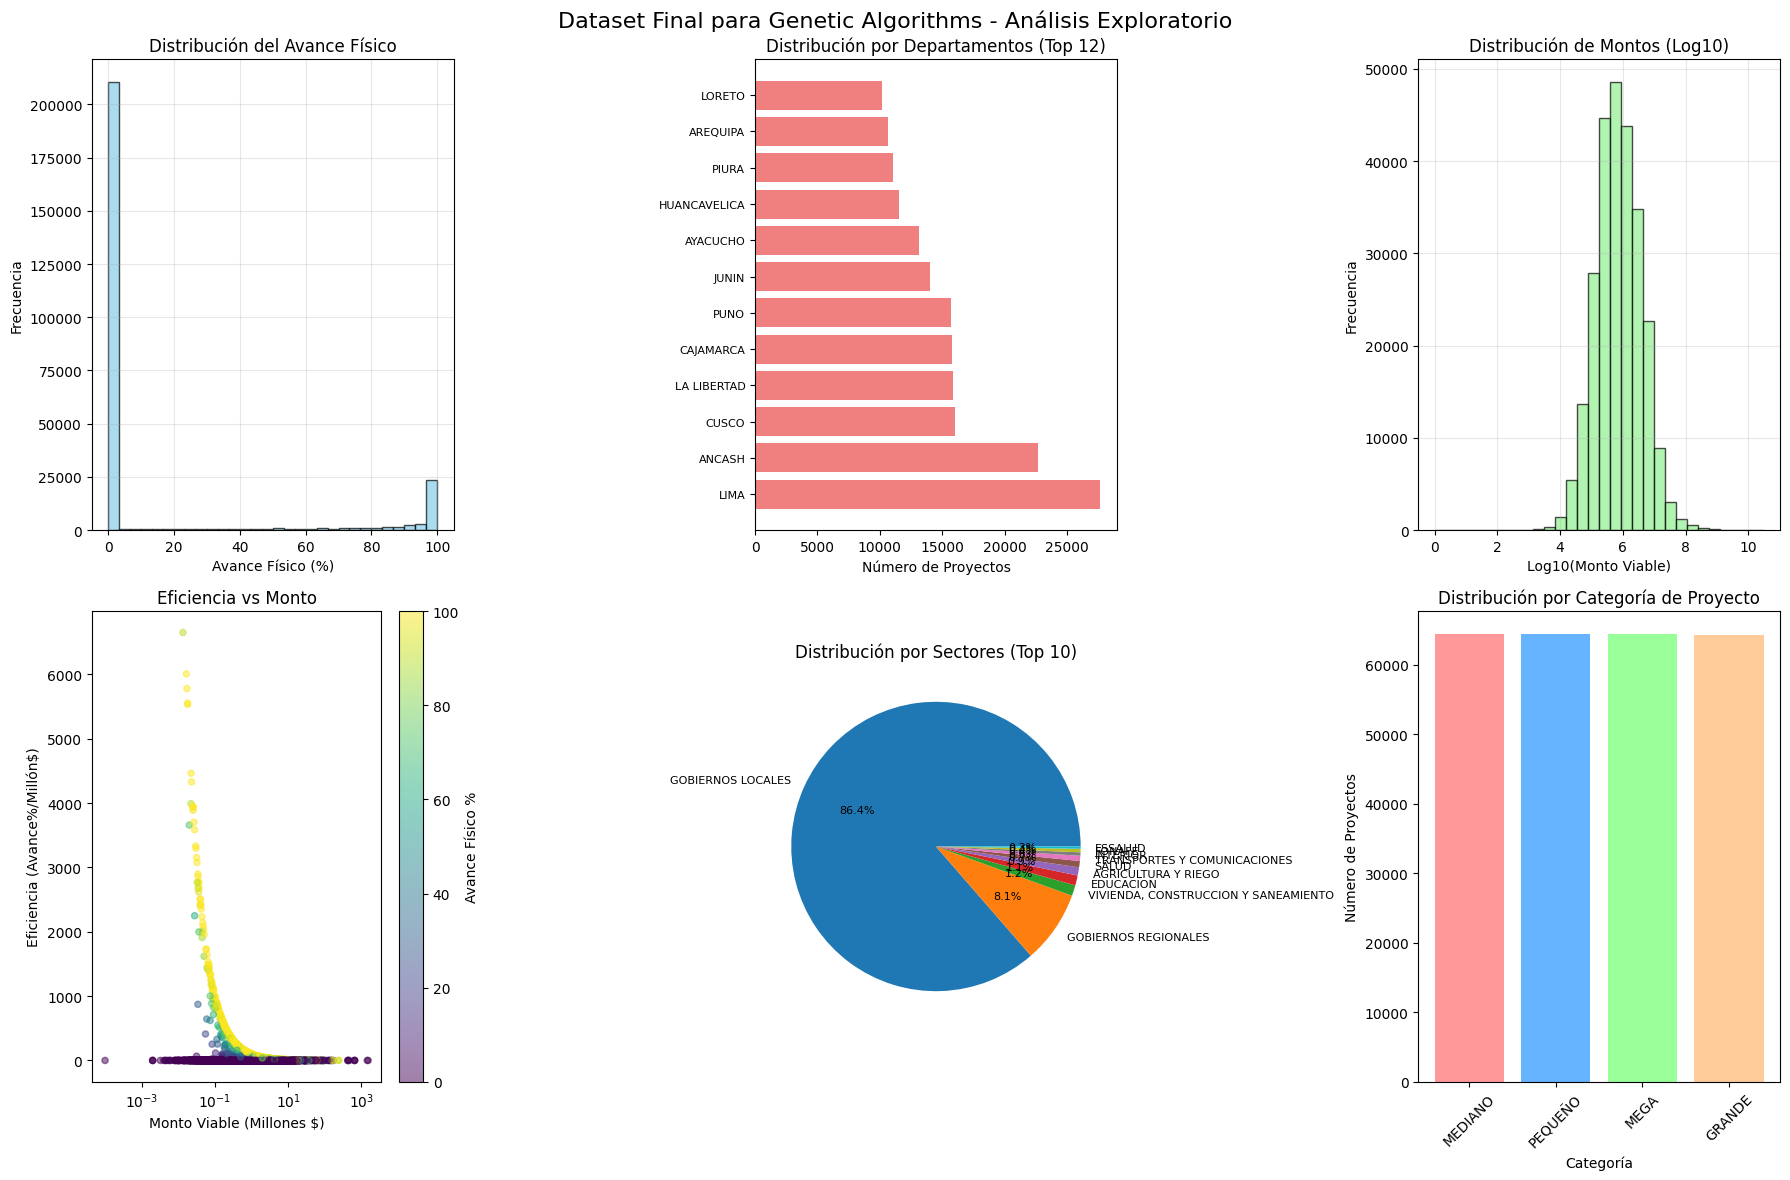

📊 Visualización guardada como: dataset_final_visualizacion.png


<Figure size 640x480 with 0 Axes>

In [ ]:
#2do paso: REFINAMIENTO DEL DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def refinamiento_final_dataset(archivo_entrada, archivo_salida='dataset_GA_final.csv'):
    """
    Refinamiento final específico para Genetic Algorithms
    Enfoque en limpiar AVANCE_FISICO y preparar variables objetivo
    """

    print("🎯 REFINAMIENTO FINAL PARA GENETIC ALGORITHMS")
    print("="*55)

    # Cargar dataset
    df = pd.read_csv(archivo_entrada, encoding='utf-8')
    print(f"📊 Dataset cargado: {len(df):,} proyectos")

    # 1. LIMPIEZA CRÍTICA DE AVANCE_FISICO (variable objetivo)
    print(f"\n1️⃣ LIMPIANDO VARIABLE OBJETIVO (AVANCE_FISICO):")

    if 'AVANCE_FISICO' in df.columns:
        print(f"   Antes - Nulos: {df['AVANCE_FISICO'].isnull().sum():,}")
        print(f"   Antes - Rango: {df['AVANCE_FISICO'].min():.1f}% a {df['AVANCE_FISICO'].max():,.1f}%")

        # Manejar valores nulos (rellena con 0 = proyecto sin avance)
        df['AVANCE_FISICO'] = df['AVANCE_FISICO'].fillna(0)

        # Corregir valores extremos (probablemente errores de captura)
        # Cualquier valor > 100% es sospechoso
        valores_extremos = (df['AVANCE_FISICO'] > 100).sum()
        print(f"   Proyectos con avance > 100%: {valores_extremos:,}")

        # Estrategia: Truncar valores > 100% a 100%
        df.loc[df['AVANCE_FISICO'] > 100, 'AVANCE_FISICO'] = 100

        print(f"   Después - Rango: {df['AVANCE_FISICO'].min():.1f}% a {df['AVANCE_FISICO'].max():.1f}%")
        print(f"   Después - Promedio: {df['AVANCE_FISICO'].mean():.1f}%")

        # Estadísticas de distribución
        distribucion = {
            'Sin avance (0%)': (df['AVANCE_FISICO'] == 0).sum(),
            'En proceso (0-50%)': ((df['AVANCE_FISICO'] > 0) & (df['AVANCE_FISICO'] < 50)).sum(),
            'Avanzado (50-99%)': ((df['AVANCE_FISICO'] >= 50) & (df['AVANCE_FISICO'] < 100)).sum(),
            'Completado (100%)': (df['AVANCE_FISICO'] == 100).sum()
        }

        print(f"   📊 Distribución del avance físico:")
        for categoria, count in distribucion.items():
            percentage = (count / len(df)) * 100
            print(f"     {categoria}: {count:,} ({percentage:.1f}%)")

    # 2. VALIDACIÓN DE RESTRICCIONES PRESUPUESTALES
    print(f"\n2️⃣ VALIDANDO RESTRICCIONES PRESUPUESTALES:")

    if 'MONTO_VIABLE' in df.columns:
        # Estadísticas financieras para GA
        print(f"   Inversión total disponible: ${df['MONTO_VIABLE'].sum():,.0f}")
        print(f"   Proyecto más barato: ${df['MONTO_VIABLE'].min():,.0f}")
        print(f"   Proyecto más caro: ${df['MONTO_VIABLE'].max():,.0f}")

        # Percentiles para entender distribución
        percentiles = df['MONTO_VIABLE'].quantile([0.25, 0.5, 0.75, 0.9, 0.95])
        print(f"   📊 Distribución de costos:")
        print(f"     Q25 (25%): ${percentiles[0.25]:,.0f}")
        print(f"     Mediana: ${percentiles[0.5]:,.0f}")
        print(f"     Q75 (75%): ${percentiles[0.75]:,.0f}")
        print(f"     Q90 (90%): ${percentiles[0.9]:,.0f}")
        print(f"     Q95 (95%): ${percentiles[0.95]:,.0f}")

    # 3. ANÁLISIS DE DISTRIBUCIÓN REGIONAL
    print(f"\n3️⃣ ANÁLISIS PARA RESTRICCIONES REGIONALES:")

    if 'DEPARTAMENTO' in df.columns:
        dist_regional = df['DEPARTAMENTO'].value_counts()
        print(f"   Departamentos únicos: {len(dist_regional)}")
        print(f"   📊 Top 10 departamentos por número de proyectos:")

        for i, (dept, count) in enumerate(dist_regional.head(10).items()):
            inversion_dept = df[df['DEPARTAMENTO'] == dept]['MONTO_VIABLE'].sum()
            print(f"     {i+1:2d}. {dept}: {count:,} proyectos (${inversion_dept:,.0f})")

        # Calcular métricas de equidad para GA
        # Coeficiente de variación (para medir desbalance regional)
        cv_regional = dist_regional.std() / dist_regional.mean()
        print(f"   📈 Coeficiente de variación regional: {cv_regional:.3f}")
        print(f"      (Menor = más equitativo, Mayor = más concentrado)")

    # 4. CREAR VARIABLES DERIVADAS OPTIMIZADAS PARA GA
    print(f"\n4️⃣ CREANDO VARIABLES PARA OPTIMIZACIÓN:")

    # Variable 1: Eficiencia de avance por millón invertido
    if 'AVANCE_FISICO' in df.columns and 'MONTO_VIABLE' in df.columns:
        df['EFICIENCIA_AVANCE'] = df['AVANCE_FISICO'] / (df['MONTO_VIABLE'] / 1_000_000)
        # Manejar infinitos (proyectos gratuitos)
        df['EFICIENCIA_AVANCE'] = df['EFICIENCIA_AVANCE'].replace([np.inf, -np.inf], df['EFICIENCIA_AVANCE'].median())
        print(f"   ✅ EFICIENCIA_AVANCE creada (avance% por millón $)")

    # Variable 2: Ratio beneficiario-costo
    if 'BENEFICIARIO' in df.columns and 'MONTO_VIABLE' in df.columns:
        df['BENEFICIARIOS_POR_MILLON'] = (df['BENEFICIARIO'] / (df['MONTO_VIABLE'] / 1_000_000))
        df['BENEFICIARIOS_POR_MILLON'] = df['BENEFICIARIOS_POR_MILLON'].replace([np.inf, -np.inf], 0)
        print(f"   ✅ BENEFICIARIOS_POR_MILLON creada (impacto social por millón $)")

    # Variable 3: Índice de prioridad combinado
    if all(col in df.columns for col in ['AVANCE_FISICO', 'BENEFICIARIO', 'MONTO_VIABLE']):
        # Normalizar variables (0-1) para combinar
        avance_norm = df['AVANCE_FISICO'] / 100  # Ya está en 0-100%
        beneficiarios_norm = (df['BENEFICIARIO'] - df['BENEFICIARIO'].min()) / (df['BENEFICIARIO'].max() - df['BENEFICIARIO'].min())
        costo_norm = 1 - ((df['MONTO_VIABLE'] - df['MONTO_VIABLE'].min()) / (df['MONTO_VIABLE'].max() - df['MONTO_VIABLE'].min()))

        # Índice combinado (30% avance + 30% beneficiarios + 40% eficiencia costo)
        df['INDICE_PRIORIDAD'] = (0.3 * avance_norm + 0.3 * beneficiarios_norm + 0.4 * costo_norm)
        print(f"   ✅ INDICE_PRIORIDAD creada (métrica combinada 0-1)")

    # Variable 4: Categorías de tamaño para restricciones
    if 'MONTO_VIABLE' in df.columns:
        # Usar percentiles para categorización equilibrada
        q25, q50, q75 = df['MONTO_VIABLE'].quantile([0.25, 0.5, 0.75])
        df['CATEGORIA_PROYECTO'] = pd.cut(
            df['MONTO_VIABLE'],
            bins=[0, q25, q50, q75, np.inf],
            labels=['PEQUEÑO', 'MEDIANO', 'GRANDE', 'MEGA'],
            include_lowest=True
        )
        print(f"   ✅ CATEGORIA_PROYECTO creada (PEQUEÑO/MEDIANO/GRANDE/MEGA)")

    # Variable 5: Estado de avance para restricciones
    if 'AVANCE_FISICO' in df.columns:
        def categorizar_avance(avance):
            if avance == 0:
                return 'SIN_INICIAR'
            elif avance < 25:
                return 'INICIAL'
            elif avance < 75:
                return 'MEDIO'
            elif avance < 100:
                return 'AVANZADO'
            else:
                return 'COMPLETADO'

        df['ESTADO_AVANCE'] = df['AVANCE_FISICO'].apply(categorizar_avance)
        print(f"   ✅ ESTADO_AVANCE creada (categorización por nivel de avance)")

    # 5. PREPARAR DATASET FINAL PARA GA
    print(f"\n5️⃣ PREPARANDO DATASET FINAL:")

    # Seleccionar columnas finales optimizadas para GA
    columnas_finales = [
        # Identificación
        'CODIGO_UNICO', 'NOMBRE_INVERSION',

        # Variable objetivo y restricciones principales
        'AVANCE_FISICO', 'MONTO_VIABLE',

        # Restricciones regionales
        'DEPARTAMENTO', 'PROVINCIA',

        # Variables de impacto
        'BENEFICIARIO', 'SECTOR',

        # Variables adicionales de análisis
        'COSTO_ACTUALIZADO', 'PIM_ANIO_ACTUAL', 'TIPO_INVERSION',

        # Variables derivadas para GA
        'EFICIENCIA_AVANCE', 'BENEFICIARIOS_POR_MILLON', 'INDICE_PRIORIDAD',
        'CATEGORIA_PROYECTO', 'ESTADO_AVANCE'
    ]

    # Filtrar solo columnas que existen
    columnas_disponibles = [col for col in columnas_finales if col in df.columns]
    df_final = df[columnas_disponibles].copy()

    # Última limpieza: eliminar proyectos con datos críticos faltantes
    antes = len(df_final)

    # Mantener solo proyectos con datos mínimos para GA
    mask_validos = (
        (df_final['MONTO_VIABLE'].notna()) &  # Debe tener costo
        (df_final['MONTO_VIABLE'] > 0) &      # Costo positivo
        (df_final['AVANCE_FISICO'].notna()) & # Debe tener avance (aunque sea 0)
        (df_final['DEPARTAMENTO'].notna())    # Debe tener ubicación
    )

    df_final = df_final[mask_validos].copy()
    print(f"   Filtro final de calidad: {antes:,} → {len(df_final):,} proyectos")

    # 6. ESTADÍSTICAS FINALES PARA GA
    print(f"\n6️⃣ ESTADÍSTICAS FINALES PARA GENETIC ALGORITHM:")

    if len(df_final) > 0:
        print(f"   📊 Proyectos finales: {len(df_final):,}")
        print(f"   💰 Presupuesto total: ${df_final['MONTO_VIABLE'].sum():,.0f}")
        print(f"   📈 Avance físico promedio: {df_final['AVANCE_FISICO'].mean():.1f}%")
        print(f"   👥 Beneficiarios totales: {df_final['BENEFICIARIO'].sum():,.0f}")
        print(f"   🗺️ Departamentos: {df_final['DEPARTAMENTO'].nunique()}")
        print(f"   🏢 Sectores: {df_final['SECTOR'].nunique()}")

        # Métricas clave para configurar GA
        print(f"\n   🎯 MÉTRICAS PARA CONFIGURAR GA:")
        print(f"     Proyecto más eficiente: {df_final['EFICIENCIA_AVANCE'].max():.2f} avance%/millón$")
        print(f"     Eficiencia promedio: {df_final['EFICIENCIA_AVANCE'].mean():.2f} avance%/millón$")
        print(f"     Mejor ratio social: {df_final['BENEFICIARIOS_POR_MILLON'].max():.0f} beneficiarios/millón$")

        # Sugerir restricciones para GA
        presupuesto_sugerido = df_final['MONTO_VIABLE'].sum() * 0.1  # 10% del total
        print(f"     Presupuesto sugerido (10%): ${presupuesto_sugerido:,.0f}")

        proyectos_sugeridos = len(df_final) // 20  # 5% de proyectos
        print(f"     Número proyectos sugerido (5%): {proyectos_sugeridos:,}")

    # 7. GUARDAR DATASET FINAL
    df_final.to_csv(archivo_salida, index=False, encoding='utf-8')
    print(f"\n💾 Dataset final guardado en: {archivo_salida}")
    print(f"   Listo para usar con Genetic Algorithms")

    # 8. CREAR ARCHIVO DE CONFIGURACIÓN PARA GA
    config_ga = {
        'dataset_info': {
            'total_projects': len(df_final),
            'total_budget': float(df_final['MONTO_VIABLE'].sum()),
            'departments': df_final['DEPARTAMENTO'].nunique(),
            'sectors': df_final['SECTOR'].nunique()
        },
        'suggested_constraints': {
            'max_budget': float(presupuesto_sugerido),
            'max_projects': proyectos_sugeridos,
            'min_departments': max(3, df_final['DEPARTAMENTO'].nunique() // 3),
            'min_sectors': max(2, df_final['SECTOR'].nunique() // 4)
        },
        'ga_parameters': {
            'population_size': min(100, max(50, len(df_final) // 1000)),
            'generations': 200,
            'crossover_rate': 0.8,
            'mutation_rate': 1.0 / len(df_final),
            'elitism_rate': 0.1
        }
    }

    # Guardar configuración como texto
    config_file = archivo_salida.replace('.csv', '_config.txt')
    with open(config_file, 'w', encoding='utf-8') as f:
        f.write("CONFIGURACIÓN RECOMENDADA PARA GENETIC ALGORITHM\n")
        f.write("="*50 + "\n\n")

        f.write(f"Dataset: {len(df_final):,} proyectos\n")
        f.write(f"Presupuesto total: ${df_final['MONTO_VIABLE'].sum():,.0f}\n\n")

        f.write("RESTRICCIONES SUGERIDAS:\n")
        f.write(f"- Presupuesto máximo: ${presupuesto_sugerido:,.0f}\n")
        f.write(f"- Proyectos máximos: {proyectos_sugeridos:,}\n")
        f.write(f"- Departamentos mínimos: {config_ga['suggested_constraints']['min_departments']}\n")
        f.write(f"- Sectores mínimos: {config_ga['suggested_constraints']['min_sectors']}\n\n")

        f.write("PARÁMETROS GA RECOMENDADOS:\n")
        f.write(f"- Tamaño población: {config_ga['ga_parameters']['population_size']}\n")
        f.write(f"- Generaciones: {config_ga['ga_parameters']['generations']}\n")
        f.write(f"- Tasa crossover: {config_ga['ga_parameters']['crossover_rate']}\n")
        f.write(f"- Tasa mutación: {config_ga['ga_parameters']['mutation_rate']:.6f}\n")

    print(f"📋 Configuración GA guardada en: {config_file}")

    return df_final

# Función para crear visualización del dataset final
def visualizar_dataset_final(archivo_dataset):
    """
    Crear visualizaciones del dataset final para el artículo
    """
    df = pd.read_csv(archivo_dataset, encoding='utf-8')

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Dataset Final para Genetic Algorithms - Análisis Exploratorio', fontsize=16)

    # 1. Distribución de avance físico
    axes[0,0].hist(df['AVANCE_FISICO'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Distribución del Avance Físico')
    axes[0,0].set_xlabel('Avance Físico (%)')
    axes[0,0].set_ylabel('Frecuencia')
    axes[0,0].grid(True, alpha=0.3)

    # 2. Top departamentos
    if 'DEPARTAMENTO' in df.columns:
        dept_counts = df['DEPARTAMENTO'].value_counts().head(12)
        axes[0,1].barh(range(len(dept_counts)), dept_counts.values, color='lightcoral')
        axes[0,1].set_yticks(range(len(dept_counts)))
        axes[0,1].set_yticklabels(dept_counts.index, fontsize=8)
        axes[0,1].set_title('Distribución por Departamentos (Top 12)')
        axes[0,1].set_xlabel('Número de Proyectos')

    # 3. Distribución de montos (log scale)
    log_montos = np.log10(df['MONTO_VIABLE'])
    axes[0,2].hist(log_montos, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0,2].set_title('Distribución de Montos (Log10)')
    axes[0,2].set_xlabel('Log10(Monto Viable)')
    axes[0,2].set_ylabel('Frecuencia')
    axes[0,2].grid(True, alpha=0.3)

    # 4. Eficiencia vs Monto
    if 'EFICIENCIA_AVANCE' in df.columns:
        sample_size = min(5000, len(df))
        sample_df = df.sample(sample_size)
        scatter = axes[1,0].scatter(sample_df['MONTO_VIABLE']/1e6,
                                  sample_df['EFICIENCIA_AVANCE'],
                                  alpha=0.5, c=sample_df['AVANCE_FISICO'],
                                  cmap='viridis', s=20)
        axes[1,0].set_xlabel('Monto Viable (Millones $)')
        axes[1,0].set_ylabel('Eficiencia (Avance%/Millón$)')
        axes[1,0].set_title('Eficiencia vs Monto')
        axes[1,0].set_xscale('log')
        plt.colorbar(scatter, ax=axes[1,0], label='Avance Físico %')

    # 5. Distribución por sectores
    if 'SECTOR' in df.columns:
        sector_counts = df['SECTOR'].value_counts().head(10)
        axes[1,1].pie(sector_counts.values, labels=sector_counts.index, autopct='%1.1f%%',
                     textprops={'fontsize': 8})
        axes[1,1].set_title('Distribución por Sectores (Top 10)')

    # 6. Categorías de proyecto
    if 'CATEGORIA_PROYECTO' in df.columns:
        cat_counts = df['CATEGORIA_PROYECTO'].value_counts()
        axes[1,2].bar(cat_counts.index, cat_counts.values, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
        axes[1,2].set_title('Distribución por Categoría de Proyecto')
        axes[1,2].set_xlabel('Categoría')
        axes[1,2].set_ylabel('Número de Proyectos')
        axes[1,2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Guardar visualización
    plt.savefig('dataset_final_visualizacion.png', dpi=300, bbox_inches='tight')
    print("📊 Visualización guardada como: dataset_final_visualizacion.png")

# Ejecutar refinamiento
if __name__ == "__main__":
    archivo_entrada = "dataset_final_suave.csv"  # Del paso anterior
    archivo_salida = "dataset_GA_optimizado.csv"

    print("🚀 EJECUTANDO REFINAMIENTO FINAL")
    dataset_optimizado = refinamiento_final_dataset(archivo_entrada, archivo_salida)

    if len(dataset_optimizado) > 1000:
        print(f"\n✅ SUCCESS: Dataset optimizado con {len(dataset_optimizado):,} proyectos")
        print("🎯 Listo para implementar Genetic Algorithms")

        # Crear visualización
        visualizar_dataset_final(archivo_salida)
    else:
        print("❌ Error: Dataset muy pequeño para GA efectivo")

In [ ]:
#3er paso: REDUCIR EL TAMAÑO DEL DATASET( Muestreo Inteligente)

import pandas as pd
import numpy as np
import time

def ultra_fast_sample(input_file: str,
                     target_size: int = 3000,
                     output_file: str = "dataset_ultra_fast.csv"):
    """
    Ultra-fast intelligent sampling:
    70% random + 30% top efficient projects (by simple efficiency metric).
    """

    print("⚡ ULTRA-FAST DATASET SAMPLING")
    print("="*40)

    start_time = time.time()

    # Load dataset
    print("📂 Loading large dataset...")
    df = pd.read_csv(input_file, encoding='utf-8')
    print(f"   Original size: {len(df):,} projects")

    # Intelligent sampling
    print("🎲 Applying smart sampling strategy...")

    if len(df) <= target_size:
        sampled_df = df
    else:
        # Simple efficiency metric
        df['simple_efficiency'] = df['AVANCE_FISICO'] / np.log10(df['MONTO_VIABLE'] + 1)
        df['simple_efficiency'] = df['simple_efficiency'].fillna(0)

        # Top 30% by efficiency
        top_size = max(int(target_size * 0.3), 500)
        top_projects = df.nlargest(top_size, 'simple_efficiency')

        # Random 70% from remaining
        remaining_df = df.drop(top_projects.index)
        random_size = target_size - len(top_projects)
        random_projects = remaining_df.sample(n=min(random_size, len(remaining_df)), random_state=42)

        # Combine
        sampled_df = pd.concat([top_projects, random_projects], ignore_index=True)
        sampled_df = sampled_df.drop(columns='simple_efficiency')

    # Summary
    print(f"📊 Sample summary:")
    print(f"   Sample size: {len(sampled_df):,}")
    print(f"   Departments: {sampled_df['DEPARTAMENTO'].nunique()}")
    print(f"   Sectors: {sampled_df['SECTOR'].nunique()}")
    print(f"   Budget: ${sampled_df['MONTO_VIABLE'].sum():,.0f}")
    print(f"   Avg progress: {sampled_df['AVANCE_FISICO'].mean():.1f}%")

    # Save output
    sampled_df.to_csv(output_file, index=False, encoding='utf-8')

    elapsed = time.time() - start_time
    print(f"✅ Sampling completed in {elapsed:.2f} seconds")
    print(f"💾 Saved to: {output_file}")

    return sampled_df

if __name__ == "__main__":
    input_dataset = "dataset_GA_optimizado.csv"
    ultra_fast_sample(input_dataset, target_size=2000)


⚡ ULTRA-FAST DATASET SAMPLING
📂 Loading large dataset...
   Original size: 257,525 projects
🎲 Applying smart sampling strategy...
📊 Sample summary:
   Sample size: 2,000
   Departments: 26
   Sectors: 18
   Budget: $3,919,643,567
   Avg progress: 40.5%
✅ Sampling completed in 1.79 seconds
💾 Saved to: dataset_ultra_fast.csv


EL DATASET CON EL QUE SE TRABAJARA EL ALGORITMO GENETICO SERA : dataset_ultra_fast.csv
